# **CS351-Lab 07**

**Feature Selection - Importance and Techniques**

The diabetes dataset has 10 features and the target is continuous, representing a quantitative measure (disease progression).
PCA with 3 components reduces the data from 10 features to 3 principal components.
A 3D scatter plot is generated to visualize the transformed data. The color of the points corresponds to the target values.

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for visualizations
sns.set(style="whitegrid")

In [3]:
# Load the Diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display the first few rows
print("Features:")
print(X.head())
print("\nTarget:")
print(y[:10])

Features:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target:
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [4]:
# Select the top 2 features using ANOVA F-Value
selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)

# Display the selected features
print("Selected Features Shape:", X_new.shape)
print("Scores for each feature:")
for i, score in enumerate(selector.scores_):
    print(f"{X.columns[i]}: {score:.2f}")

Selected Features Shape: (442, 2)
Scores for each feature:
age: 1.09
sex: 1.08
bmi: 2.03
bp: 1.55
s1: 0.92
s2: 0.89
s3: 1.62
s4: 1.54
s5: 2.05
s6: 1.19


In [5]:
# Apply PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Display explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.40242108 0.14923197 0.12059663]


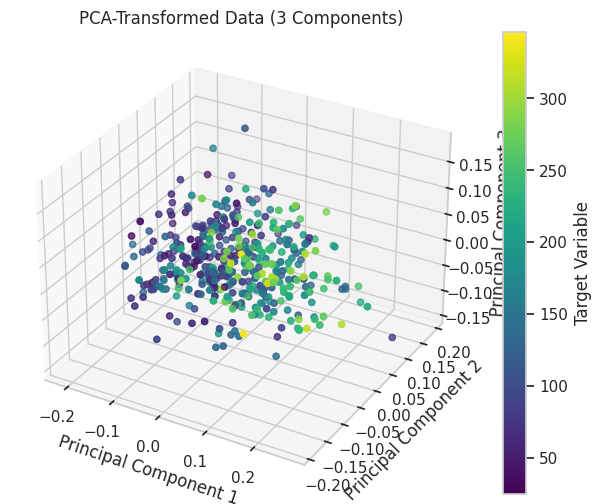

In [6]:
# Plot the PCA-transformed data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the first three components
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')
ax.set_title("PCA-Transformed Data (3 Components)")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Show color bar
plt.colorbar(ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis'), label='Target Variable')

plt.show()